In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
import pandas as pd
import numpy as np



# **FGSM (Fast Gradient Sign Method)**

In [2]:
# Combine legitimate and malicious data for training
fgsm_combined_data = pd.read_csv("/kaggle/input/adversarial-machine-learning-dataset/dnstunneling/malicious/fgsm_combined.csv")

# Extract features and target variable
X = fgsm_combined_data[['mDt', 'mA', 'mQ', 'vDt', 'vA', 'vQ', 'sDt', 'sA', 'sQ', 'kDt', 'kA', 'kQ']]
y = fgsm_combined_data['attack']  # Target variable for adversarial detection

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remove rows where y_train or y_test have NaN values and filter corresponding X
train_mask = y_train.notnull()
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = y_test.notnull()
X_test = X_test[test_mask]
y_test = y_test[test_mask]

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy)


Confusion Matrix:
 [[865  14]
 [ 31 890]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       879
           1       0.98      0.97      0.98       921

    accuracy                           0.97      1800
   macro avg       0.97      0.98      0.97      1800
weighted avg       0.98      0.97      0.98      1800

Accuracy Score: 0.975


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


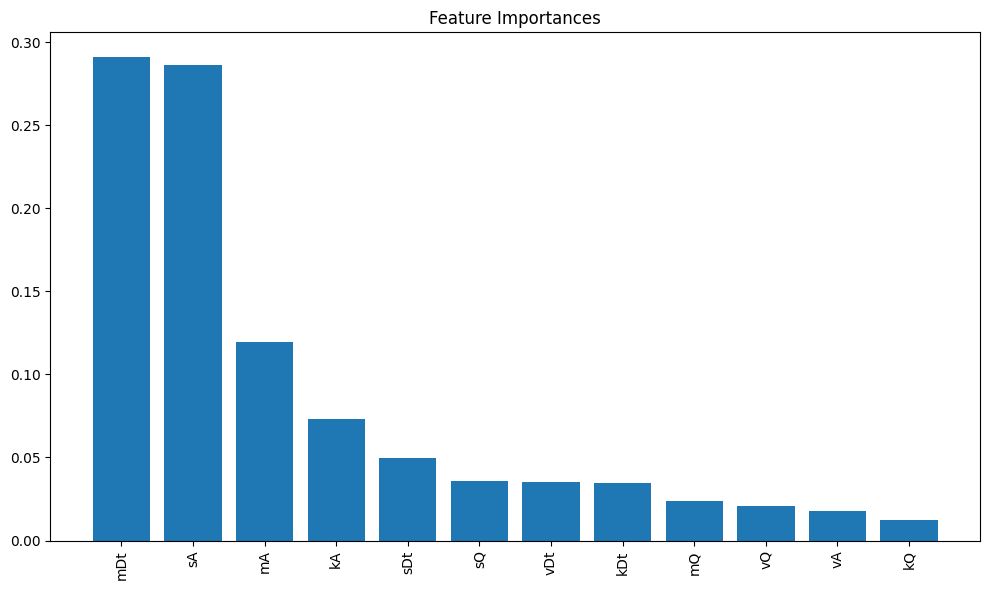

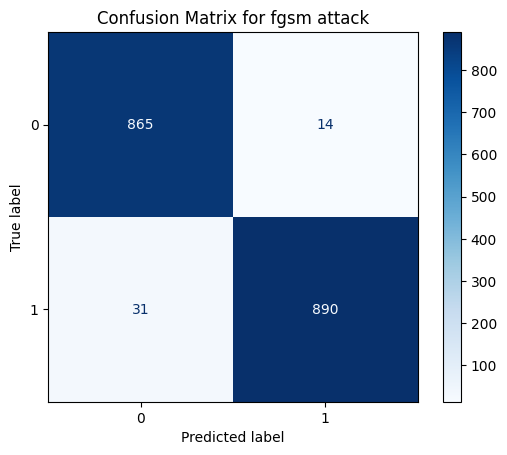

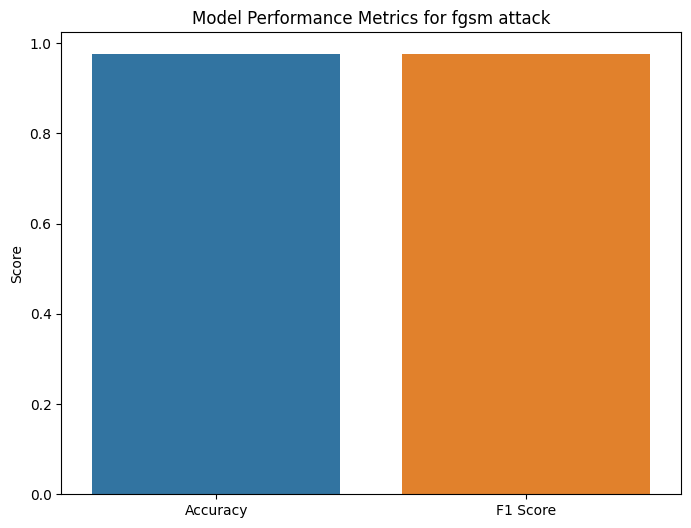

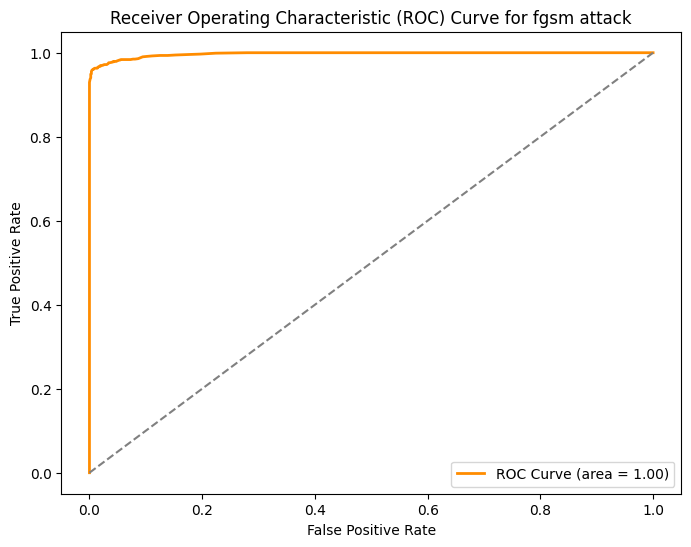

In [3]:

# 1. Feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
#plt.show()
plt.savefig("Feature Importances fgsm.png",dpi=300)
# 2. Confusion matrix plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for fgsm attack')
#plt.show()
plt.savefig("Confusion Matrix fgsm.png",dpi=300)

# Accuracy and F1 score 
metrics = {'Accuracy': accuracy, 'F1 Score': f1}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())
plt.figure(figsize=(8,6))
sns.barplot(x=metric_names, y=metric_values)
plt.title("Model Performance Metrics for fgsm attack")
plt.ylabel("Score")
#plt.show()
plt.savefig("Model Performance Metrics fgsm.png",dpi=300)


# 4. ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for fgsm attack')
plt.legend(loc='lower right')
#plt.show()
plt.savefig("Receiver Operating Characteristic (ROC) Curve fgsm.png",dpi=300)



# **JSMA (Jacobian-based Saliency Map Attack)**

In [4]:
# Combine legitimate and malicious data for training
jsma_combined_data = pd.read_csv("/kaggle/input/adversarial-machine-learning-dataset/dnstunneling/malicious/jsma_combined.csv")

# Extract features and target variable
X = jsma_combined_data[['mDt', 'mA', 'mQ', 'vDt', 'vA', 'vQ', 'sDt', 'sA', 'sQ', 'kDt', 'kA', 'kQ']]
y = jsma_combined_data['attack']  # Target variable for adversarial detection

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remove rows where y_train or y_test have NaN values and filter corresponding X
train_mask = y_train.notnull()
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = y_test.notnull()
X_test = X_test[test_mask]
y_test = y_test[test_mask]

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy)


Confusion Matrix:
 [[888   0]
 [  3 909]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       888
           1       1.00      1.00      1.00       912

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800

Accuracy Score: 0.9983333333333333


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


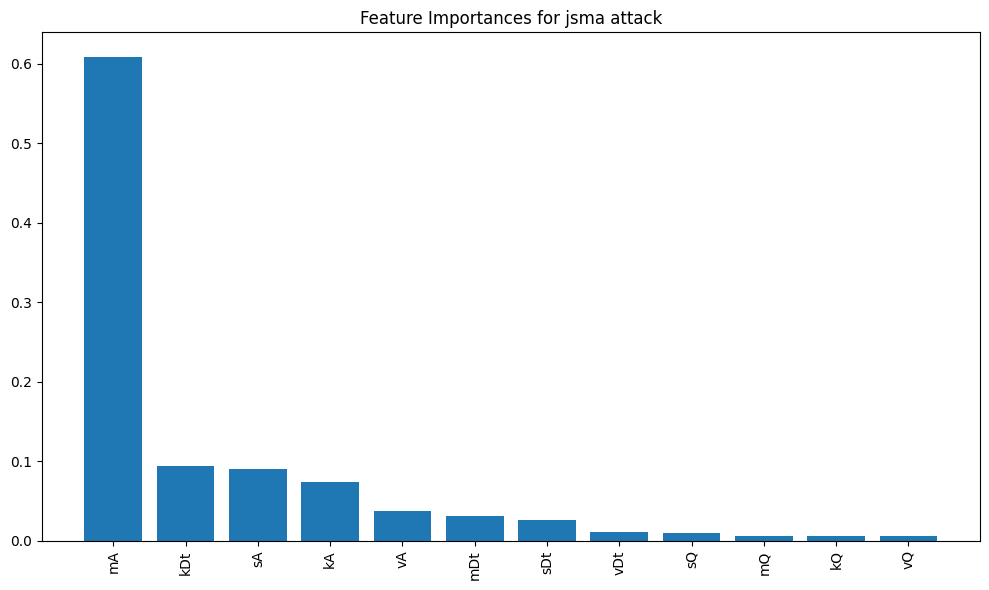

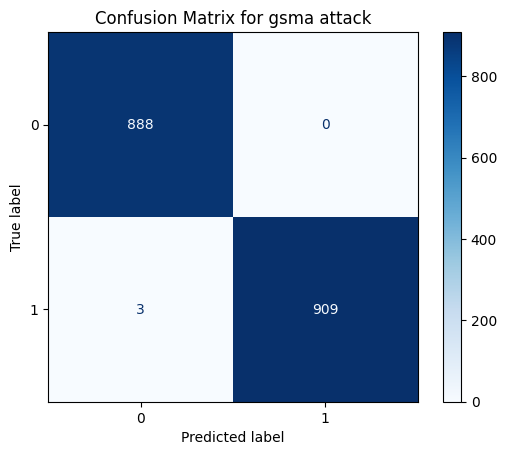

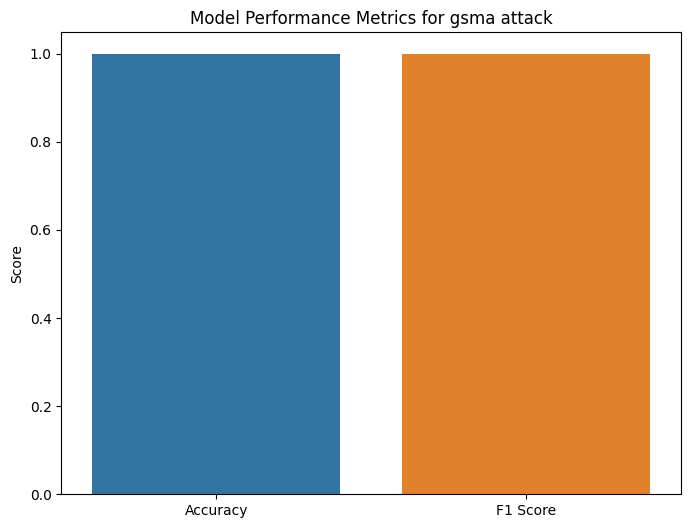

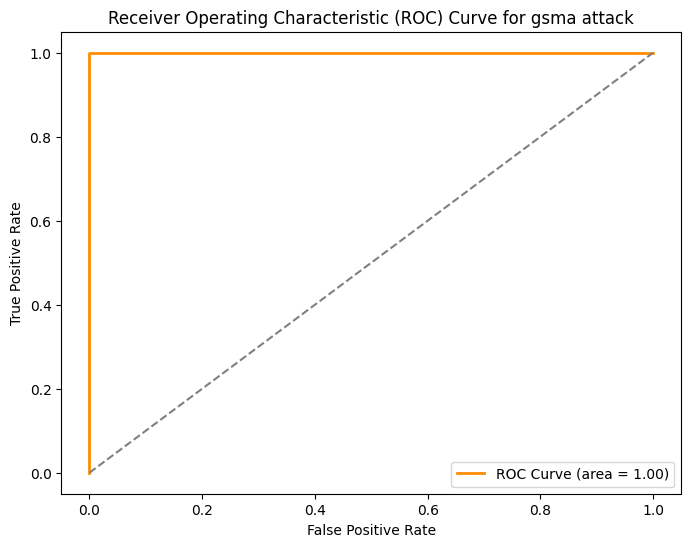

In [5]:

# 2. Feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances for jsma attack')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
#plt.show()
plt.savefig("Feature Importances jsma.png",dpi=300)


# 3. Confusion matrix plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for gsma attack')
#plt.show()
plt.savefig("Confusion Matrix jsma.png",dpi=300)


metrics = {'Accuracy': accuracy, 'F1 Score': f1}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())
plt.figure(figsize=(8,6))
sns.barplot(x=metric_names, y=metric_values)
plt.title("Model Performance Metrics for gsma attack")
plt.ylabel("Score")
#plt.show()
plt.savefig("Model Performance Metrics jsma.png",dpi=300)


# 4. ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for gsma attack')
plt.legend(loc='lower right')
#plt.show()
plt.savefig("Receiver Operating Characteristic (ROC) Curve jsma.png",dpi=300)



# **CW (Carlini & Wagner Attack)**

In [6]:
combined_data=pd.read_csv("/kaggle/input/adversarial-machine-learning-dataset/dnstunneling/malicious/cw_combined.csv")


# Extract features and target variable
X = combined_data[['mDt', 'mA', 'mQ', 'vDt', 'vA', 'vQ', 'sDt', 'sA', 'sQ', 'kDt', 'kA', 'kQ']]
y = combined_data['attack']  # Target variable for adversarial detection

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remove rows where y_train or y_test is NaN
X_train = X_train[y_train.notnull()]
y_train = y_train[y_train.notnull()]
X_test = X_test[y_test.notnull()]
y_test = y_test[y_test.notnull()]

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
model = GradientBoostingClassifier(random_state=42)
    
model.fit(X_train,y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy)


Confusion Matrix:
 [[859  42]
 [443 456]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.95      0.78       901
           1       0.92      0.51      0.65       899

    accuracy                           0.73      1800
   macro avg       0.79      0.73      0.72      1800
weighted avg       0.79      0.73      0.72      1800

Accuracy Score: 0.7305555555555555


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


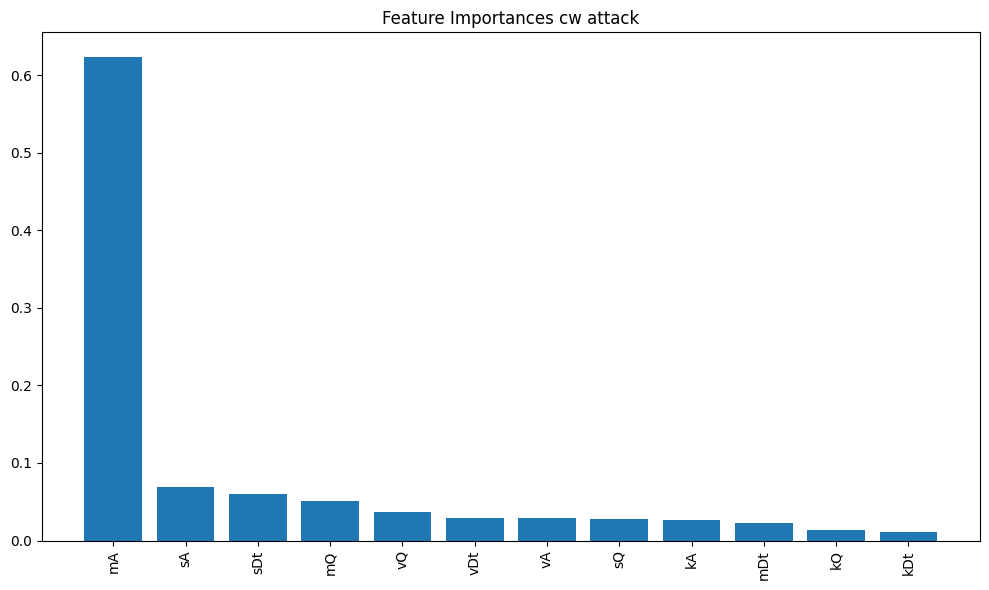

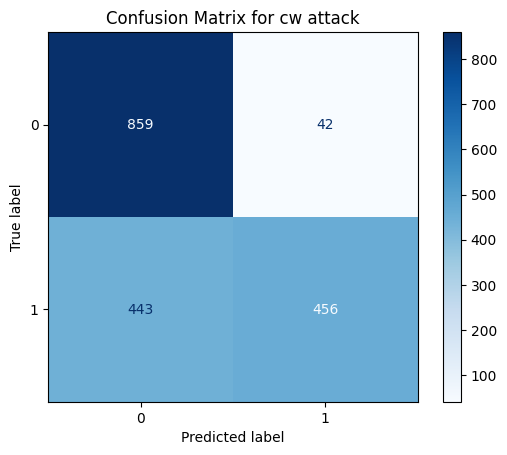

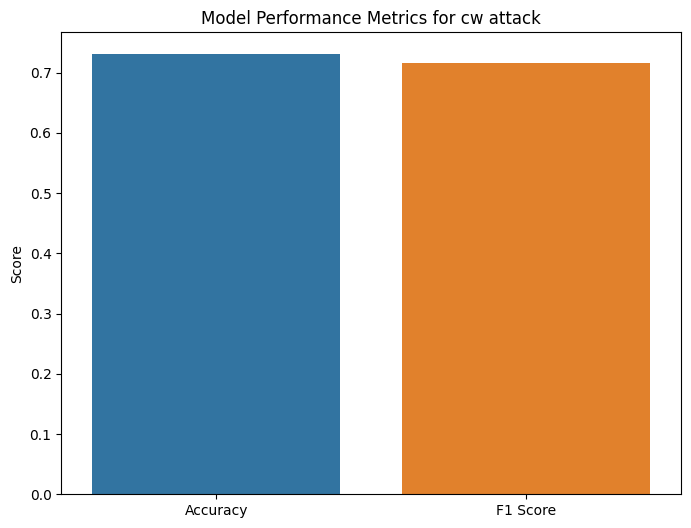

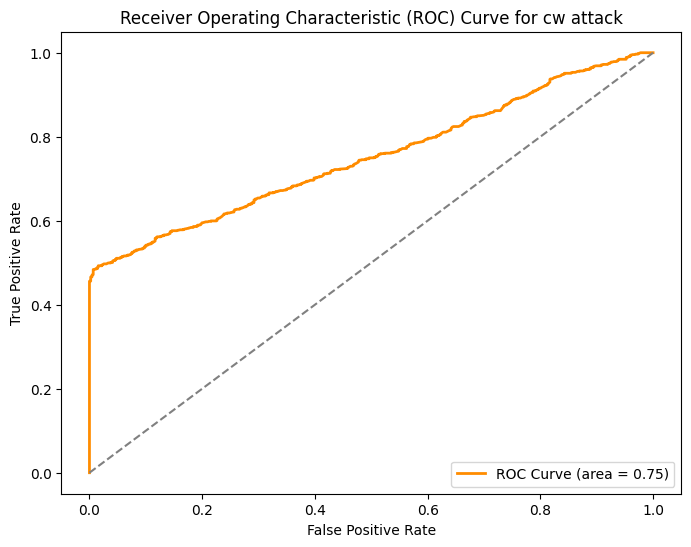

In [7]:
# 2. Feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances cw attack')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
#plt.show()
plt.savefig("Feature Importances cw.png",dpi=300)


# 3. Confusion matrix plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix for cw attack')
#plt.show()
plt.savefig("Confusion Matrix cw.png",dpi=300)



metrics = {'Accuracy': accuracy, 'F1 Score': f1}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())
plt.figure(figsize=(8,6))
sns.barplot(x=metric_names, y=metric_values)
plt.title("Model Performance Metrics for cw attack")
plt.ylabel("Score")
#plt.show()
plt.savefig("Model Performance Metrics cw.png",dpi=300)



# 4. ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for cw attack')
plt.legend(loc='lower right')
#plt.show()
plt.savefig("Receiver Operating Characteristic (ROC) Curve cw.png",dpi=300)

